In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings as ws
ws.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
def clean_name(name):
    return name.strip().lower().replace(" ", "_")

In [6]:
df.rename(columns=clean_name, inplace=True)

In [7]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X= df.drop("outcome", axis = 1)
y = df["outcome"]

In [9]:
X.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
X[["insulin", "skinthickness"]] =  X[["insulin", "skinthickness"]].replace({0: np.nan})

In [11]:
X.fillna(df.median(), inplace=True)

In [12]:
X.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35.0,30.5,33.6,0.627,50
1,1,85,66,29.0,30.5,26.6,0.351,31
2,8,183,64,23.0,30.5,23.3,0.672,32
3,1,89,66,23.0,94.0,28.1,0.167,21
4,0,137,40,35.0,168.0,43.1,2.288,33


In [13]:
X.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
dtype: int64

In [14]:
# Splitting the data

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.columns.to_list():
    sns.distplot(df[i])
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [16]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

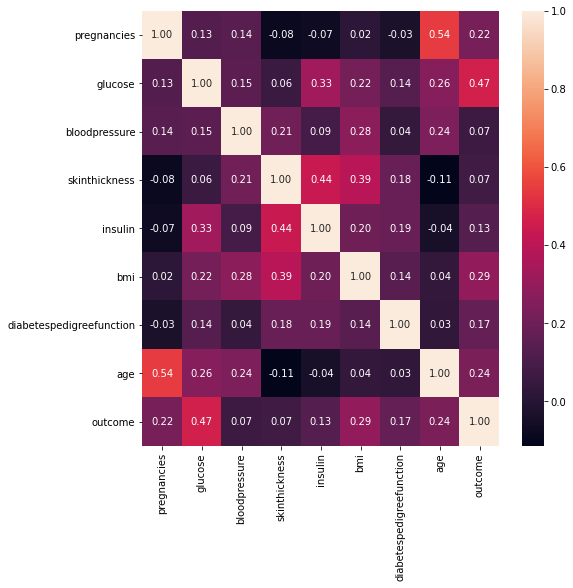

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

In [18]:
pd.DataFrame(df.corr()["outcome"]).reset_index().rename(columns= {'index' : "col", "outcome" : "correlation"}).sort_values(by = "correlation", ascending = False)

,col,correlation
8,outcome,1.000000
1,glucose,0.466581
5,bmi,0.292695
7,age,0.238356
0,pregnancies,0.221898
6,diabetespedigreefunction,0.173844
4,insulin,0.130548
3,skinthickness,0.074752
2,bloodpressure,0.065068


In [19]:
col = ['glucose', 'bmi', 'age', 'pregnancies']
X = df[col]

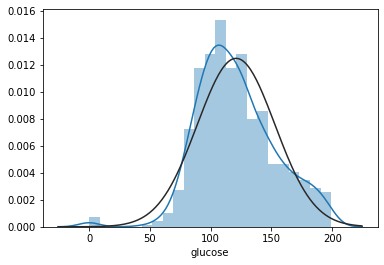

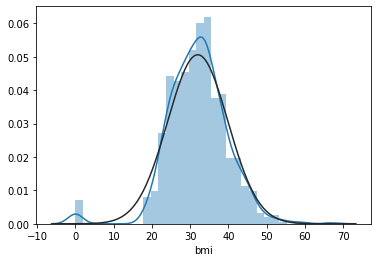

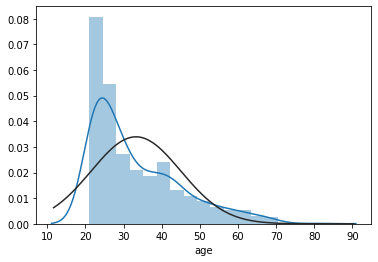

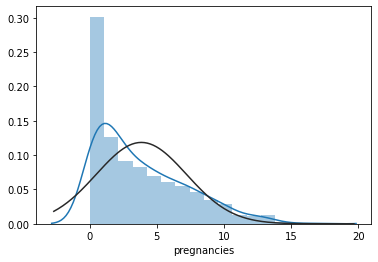

In [20]:
from scipy.stats import norm
for i in X.columns.to_list():
    sns.distplot(df[i], fit=norm)
    plt.show()

In [26]:
X.age = np.log(X.age)

In [27]:
X.head()

,glucose,bmi,age,pregnancies
0,148,33.6,3.912023,6
1,85,26.6,3.433987,1
2,183,23.3,3.465736,8
3,89,28.1,3.044522,1
4,137,43.1,3.496508,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 42, stratify = y)
from sklearn.preprocessing import StandardScaler
scaler_ = StandardScaler()
X_train = scaler_.fit_transform(X_train)
X_test = scaler_.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
for i in [LogisticRegression(), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]:
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    print(i.__class__.__name__ , " score is ", acc)

LogisticRegression  score is  0.7207792207792207
GaussianNB  score is  0.7272727272727273
KNeighborsClassifier  score is  0.7142857142857143
DecisionTreeClassifier  score is  0.6948051948051948
RandomForestClassifier  score is  0.7597402597402597


In [34]:
# Tuning the  RandomForest

param = {
    'max_depth' : [4,6],
    'n_estimators' : [100,200,500],
}
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(rf, param, scoring="roc_auc", cv = 3,  verbose = 1)
gsv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [35]:
gsv.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [36]:
gsv.best_score_

0.8268446295315354

In [37]:
# Final rfe
rf_final = RandomForestClassifier(**gsv.best_params_)

In [38]:
rf_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_pred = rf_final.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
print (accuracy_score(y_test, y_pred))

0.7272727272727273


In [42]:
print(confusion_matrix(y_test, y_pred))

[[84 16]
 [26 28]]


### clearly the model is overfitting the data hene we need the more data and hence this will remove the overfitting